In [41]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [42]:
# device = (
#     "cuda"
#     if torch.cuda.is_available()
#     else "mps"
#     if torch.backends.mps.is_available()
#     else "cpu"
# )
# print(f"Using {device} device")

In [43]:
import pandas as pd
data = pd.read_csv("/content/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
X=data.drop('Outcome',axis=1).values### independent features
y=data['Outcome'].values###dependent features

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
#Convert X and y to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [47]:
## Create a simple network
import torch.nn.functional as F

class ANN_model(nn.Module):
  def __init__(self, input_features = 8, hidden1= 20, hidden2 = 20, out_features=2):
    super().__init__()
    self.f_connected1 = nn.Linear(input_features, hidden1)
    self.f_connected2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, out_features)

  def forward(self, x):
    x = F.relu(self.f_connected1(x))
    x = F.relu(self.f_connected2(x))
    x = self.out(x)
    return x



In [48]:
##Instantiate model
torch.manual_seed(20)
model = ANN_model()


In [49]:
model

ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [50]:
model.parameters

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [51]:
##Backward propogation
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [52]:
##Run the model
epochs = 1000
final_losses = []
for i in range(epochs):
  i = i+1
  y_pred = model.forward(X_train)
  loss = loss_function(y_pred, y_train)
  final_losses.append(loss)
  if i%10==1:
    print("NUmber of epochs {} and loss {}".format(i, loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

NUmber of epochs 1 and loss 3.4572105407714844
NUmber of epochs 11 and loss 0.8019208312034607
NUmber of epochs 21 and loss 0.6090322136878967
NUmber of epochs 31 and loss 0.5917770862579346
NUmber of epochs 41 and loss 0.5679708123207092
NUmber of epochs 51 and loss 0.5529041886329651
NUmber of epochs 61 and loss 0.5410094857215881
NUmber of epochs 71 and loss 0.5310390591621399
NUmber of epochs 81 and loss 0.5220361351966858
NUmber of epochs 91 and loss 0.5135971903800964
NUmber of epochs 101 and loss 0.5061255097389221
NUmber of epochs 111 and loss 0.4983409643173218
NUmber of epochs 121 and loss 0.4960551857948303
NUmber of epochs 131 and loss 0.4828636944293976
NUmber of epochs 141 and loss 0.4755900204181671
NUmber of epochs 151 and loss 0.4819873869419098
NUmber of epochs 161 and loss 0.48064330220222473
NUmber of epochs 171 and loss 0.4706853926181793
NUmber of epochs 181 and loss 0.4590798020362854
NUmber of epochs 191 and loss 0.4508015811443329
NUmber of epochs 201 and loss 

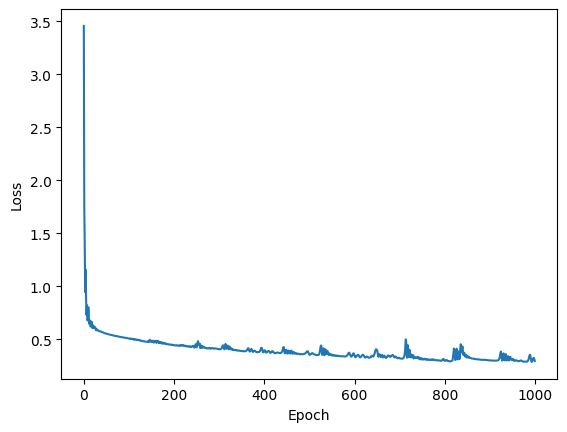

In [54]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline
with torch.no_grad():
  plt.plot(range(epochs),final_losses)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')

In [55]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
1
0
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
1
0
1
0
0
0
0


In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[85, 22],
       [18, 29]])

In [57]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7402597402597403